In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
articles = pd.read_csv('../data/processed/articles_headline_group.csv', parse_dates=True)

In [26]:
articles.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2


In [28]:
articles['BUREAU'].value_counts()

technology-and-telecom            5366
consumer-goods                    4480
health-care                       2977
industrials                       2359
investment-planning               2040
financials                        1978
energy-materials-and-utilities    1513
cryptocurrency                     754
markets                            581
real estate                        534
cannabis                           517
Name: BUREAU, dtype: int64

In [29]:
# set X 
X = articles['PROMO']

In [30]:
# examine X
X

0        These two companies an enjoying explosive top-...
1           Just how different is it from a cash dividend?
2        There are strong reasons to invest in Amazon r...
3        For some investors, dividend income that flows...
4        Both companies dominate much of our digital li...
                               ...                        
23094    The biotech's experimental blood cancer treatm...
23095    These former stock market darlings can be purc...
23096    Lockdowns in China might create a beneficial e...
23097    CrowdStrike's stock has cratered during the te...
23098    Insane home price growth has made iBuying more...
Name: PROMO, Length: 23099, dtype: object

In [31]:
# instantiate count vectorizer
cvect = CountVectorizer(stop_words='english', max_features=150)

In [32]:
# fit on headlinge
Xv = cvect.fit_transform(X)

In [33]:
Xv

<23099x150 sparse matrix of type '<class 'numpy.int64'>'
	with 73497 stored elements in Compressed Sparse Row format>

In [34]:
kmeans = KMeans(n_clusters = 10).fit(Xv)

In [35]:
kmeans.labels_

array([3, 1, 2, ..., 5, 5, 3], dtype=int32)

In [36]:
articles['PROMO_GROUP'] = kmeans.labels_

In [37]:
articles.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0,3
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2,1
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5,2
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0,6
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2,1


In [38]:
articles['PROMO_GROUP'] .value_counts()

1    12107
0     2605
5     2075
2     1934
6     1500
3     1050
4      703
8      520
9      362
7      243
Name: PROMO_GROUP, dtype: int64

In [39]:
articles.groupby(['PROMO_GROUP', 'PROMO']).count()

Unnamed: 0  \
PROMO_GROUP PROMO                                                            
0           A earnings call for the period ending July 31, ...           1   
            AAL earnings call for the period ending Septemb...           1   
            AAOI earnings call for the period ending June 3...           1   
            AAOI earnings call for the period ending Septem...           1   
            AAON earnings call for the period ending June 3...           1   
...                                                                    ...   
9           Worries about a resurgence in COVID-19 cases ar...           1   
            Yes, one or more COVID-19 vaccines could realis...           1   
            You don't have to take on a huge amount of risk...           1   
            Yum! cites the executive's digital experience a...           1   
            Zoom Video Communications has gone from COVID-1...           1   

                                                                Unnamed: 0.1  \
PROMO_GROUP PROMO                                                              
0           A earnings call for the period ending July 31, ...             1   
            AAL earnings call for the period ending Septemb...             1   
            AAOI earnings call for the period ending June 3...             1   
            AAOI earnings call for the period ending Septem...             1   
            AAON earnings call for the period ending June 3...             1   
...                                                                      ...   
9           Worries about a resurgence in COVID-19 cases ar...             1   
            Yes, one or more COVID-19 vaccines could realis...             1   
            You don't have to take on a huge amount of risk...             1   
            Yum! cites the executive's digital experience a...             1   
            Zoom Video Communications has gone from COVID-1...             1   

                                                                HEADLINE  \
PROMO_GROUP PROMO                                                          
0           A earnings call for the period ending July 31, ...         1   
            AAL earnings call for the period ending Septemb...         1   
            AAOI earnings call for the period ending June 3...         1   
            AAOI earnings call for the period ending Septem...         1   
            AAON earnings call for the period ending June 3...         1   
...                                                                  ...   
9           Worries about a resurgence in COVID-19 cases ar...         1   
            Yes, one or more COVID-19 vaccines could realis...         1   
            You don't have to take on a huge amount of risk...         1   
            Yum! cites the executive's digital experience a...         1   
            Zoom Video Communications has gone from COVID-1...         1   

                                                                HEADLINE_LEN  \
PROMO_GROUP PROMO                                                              
0           A earnings call for the period ending July 31, ...             1   
            AAL earnings call for the period ending Septemb...             1   
            AAOI earnings call for the period ending June 3...             1   
            AAOI earnings call for the period ending Septem...             1   
            AAON earnings call for the period ending June 3...             1   
...                                                                      ...   
9           Worries about a resurgence in COVID-19 cases ar...             1   
            Yes, one or more COVID-19 vaccines could realis...             1   
            You don't have to take on a huge amount of risk...             1   
            Yum! cites the executive's digital experience a...             1   
            Zoom Video Communications has gone from COVID-1

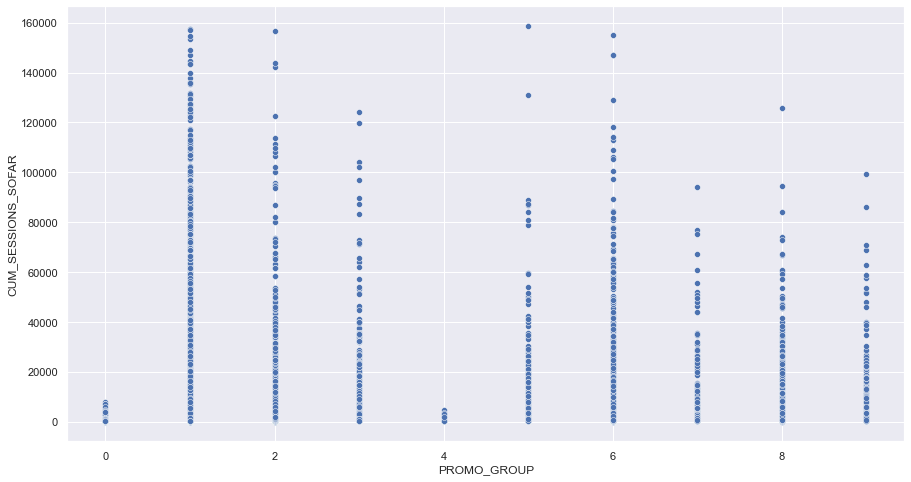

In [40]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles, x='PROMO_GROUP', y='CUM_SESSIONS_SOFAR' );

- the promo label does seem to have some relationship with the cumulative sessions

In [41]:
articles.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0,3
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2,1
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5,2
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0,6
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2,1


In [42]:
articles.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
articles.drop('Unnamed: 0.1', axis=1, inplace=True)

In [44]:
articles.head()

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0,3
1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2,1
2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5,2
3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0,6
4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2,1


In [46]:
articles.to_csv('../data/processed/articles_promo_group.csv')